# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Cetin, Taha Atabay (s349501);
2. Eroglu, Mert Deniz (s351677).

Now, fill the python list below with the Student IDs of the team

In [3]:
StudentIDs = [349501, 351677]  # <-------- Fill this list with Student IDs of the team

##### **If you are running Windows on Intel CPU**, you might encounter the following issue while performing KMeans Clustering:

*UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.*


Hence, due to a conflict with the Intel Math Kernel Library, we need to set the environment variable "OMP_NUM_THREADS" to "1" in order to avoid potential issues with multi-threading during computations. Please execute the following code below to fix the issue (before importing KMeans from SKLearn):

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [5]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Shopping centres
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
History
Psychology
Mathematics
Internet
PC
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Cars
Art exhibitions
Countryside, outdoors
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Adrenaline sports
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
Fantasy/Fairy tales
Animated
Documentary
Western
Action
Music
Slow songs or fast songs
Dance
Folk
Classical music
Pop
Rock
Reggae, Ska
Swing, Jazz
Rock n roll
Latino
Techno, Trance
Opera
Daily events
Prioritising workload
Writing notes
Thinking ahead
Final judgement
Keeping promises
Loss of interest
Friends versus money
Criminal damage
Decision making
Judgment calls
Hypochondria
Empathy
Eating to survive
Giving
Compassion to animals
Borrowed stuff
Loneliness
Health
Dreams
Charity
Number of friends
Waiting
Mood swings
Childr

,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,History,Psychology,Mathematics,Internet,PC,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
564,2,1,2,4,5,3,4,2,5,4,...,20,162,50,0,female,right,college/bachelor degree,yes,city,block of flats
90,1,4,4,2,3,4,4,4,5,1,...,16,161,54,1,female,right,secondary school,no,village,house/bungalow
126,1,1,1,3,5,5,4,3,5,5,...,22,191,85,1,male,right,secondary school,no,village,house/bungalow
299,3,3,1,1,3,3,5,1,3,2,...,23,158,53,0,female,right,secondary school,yes,village,house/bungalow
170,5,5,5,5,5,5,4,3,5,3,...,19,171,57,0,female,right,secondary school,yes,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,5,3,3,3,3,3,2,2,4,2,...,20,170,60,1,female,right,secondary school,yes,city,house/bungalow
174,5,3,4,3,5,3,4,4,4,3,...,18,180,60,1,female,right,secondary school,yes,city,block of flats
240,3,5,2,4,2,5,2,3,3,5,...,17,185,73,1,male,right,primary school,no,city,block of flats
538,5,5,5,5,5,4,4,4,4,4,...,30,173,69,0,female,right,secondary school,yes,city,block of flats



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,History,Psychology,Mathematics,Internet,PC,...,Parents' advice,Questionnaires or polls,Internet usage,Flying,Storm,Heights,Spiders,Rats,Ageing,Dangerous dogs
564,2,1,2,4,5,3,4,2,5,4,...,5,3,few hours a day,1,1,5,4,1,1,1
90,1,4,4,2,3,4,4,4,5,1,...,4,5,few hours a day,4,2,2,2,1,1,2
126,1,1,1,3,5,5,4,3,5,5,...,4,3,most of the day,3,1,2,1,1,4,4
299,3,3,1,1,3,3,5,1,3,2,...,3,3,less than an hour a day,1,2,2,1,1,1,2
170,5,5,5,5,5,5,4,3,5,3,...,4,3,less than an hour a day,1,3,5,1,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,5,3,3,3,3,3,2,2,4,2,...,3,2,less than an hour a day,1,3,2,3,2,3,3
174,5,3,4,3,5,3,4,4,4,3,...,5,3,few hours a day,2,4,2,5,5,3,4
240,3,5,2,4,2,5,2,3,3,5,...,2,3,few hours a day,1,1,3,1,1,1,2
538,5,5,5,5,5,4,4,4,4,4,...,4,4,most of the day,1,1,1,5,3,3,1



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
564,20,162,50,0,female,right,college/bachelor degree,yes,city,block of flats
90,16,161,54,1,female,right,secondary school,no,village,house/bungalow
126,22,191,85,1,male,right,secondary school,no,village,house/bungalow
299,23,158,53,0,female,right,secondary school,yes,village,house/bungalow
170,19,171,57,0,female,right,secondary school,yes,city,block of flats
...,...,...,...,...,...,...,...,...,...,...
227,20,170,60,1,female,right,secondary school,yes,city,house/bungalow
174,18,180,60,1,female,right,secondary school,yes,city,block of flats
240,17,185,73,1,male,right,primary school,no,city,block of flats
538,30,173,69,0,female,right,secondary school,yes,city,block of flats


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [6]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
# import ...
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [7]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
...

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
...

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [8]:
# [write the code here]
filepath = "columns_hw.csv"
categoricals = []
with open(filepath, "r") as f:
    for line in f:
        temp = line.strip().split(",")
        if(temp[-1]=="category"):
            categoricals.append(temp[1])

#we dont have all the categories since the datasets are chosen as a subset of the original
current_categs = set(responses_ft.columns)
categoricals = [x for x in categoricals if x in current_categs]
#now we have categorical datas from our assigned dataset
print(categoricals)

#we will see the correct answer options and map them accordingly
for col in categoricals:
    print(f"Column: {col}")
    print(responses_ft[col].unique())
    print("-" * 20)

#we see that our only categorical feature is "internet usage"
internet_map = {
    "no time at all": 0,
    "less than an hour a day": 1,
    "few hours a day": 2,
    "most of the day": 3
}

#here is our responses_ft_enc
responses_ft_enc = responses_ft.copy()
responses_ft_enc["Internet usage"] = responses_ft_enc["Internet usage"].map(internet_map)
display(responses_ft_enc)
#now we have our categorical feature encoded correctly

#to preprocess and normalize our data, we will use the assigned scaler to us, which is the StandardScaler
scaler = StandardScaler()
responses_stand_array = scaler.fit_transform(responses_ft_enc)
#here is our responses_ft_pp
responses_ft_pp = pd.DataFrame(responses_stand_array, columns=responses_ft_enc.columns, index=responses_ft_enc.index)
display(responses_ft_pp)
    

['Internet usage']
Column: Internet usage
['few hours a day' 'most of the day' 'less than an hour a day']
--------------------


,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,History,Psychology,Mathematics,Internet,PC,...,Parents' advice,Questionnaires or polls,Internet usage,Flying,Storm,Heights,Spiders,Rats,Ageing,Dangerous dogs
564,2,1,2,4,5,3,4,2,5,4,...,5,3,2,1,1,5,4,1,1,1
90,1,4,4,2,3,4,4,4,5,1,...,4,5,2,4,2,2,2,1,1,2
126,1,1,1,3,5,5,4,3,5,5,...,4,3,3,3,1,2,1,1,4,4
299,3,3,1,1,3,3,5,1,3,2,...,3,3,1,1,2,2,1,1,1,2
170,5,5,5,5,5,5,4,3,5,3,...,4,3,1,1,3,5,1,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,5,3,3,3,3,3,2,2,4,2,...,3,2,1,1,3,2,3,2,3,3
174,5,3,4,3,5,3,4,4,4,3,...,5,3,2,2,4,2,5,5,3,4
240,3,5,2,4,2,5,2,3,3,5,...,2,3,2,1,1,3,1,1,1,2
538,5,5,5,5,5,4,4,4,4,4,...,4,4,3,1,1,1,5,3,3,1


,Shopping centres,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,History,Psychology,Mathematics,Internet,PC,...,Parents' advice,Questionnaires or polls,Internet usage,Flying,Storm,Heights,Spiders,Rats,Ageing,Dangerous dogs
564,-0.986418,-1.904935,-0.911240,0.916049,1.413916,-0.184489,0.734008,-0.254056,0.899036,0.678681,...,2.133003,0.191772,0.066687,-0.84511,-0.833708,1.906648,0.735915,-1.021505,-1.102636,-1.458462
90,-1.761460,0.700192,0.768496,-0.649899,-0.476286,0.606626,0.734008,1.258326,0.899036,-1.636460,...,0.927082,2.022656,0.066687,1.81646,0.052545,-0.450267,-0.563816,-1.021505,-1.102636,-0.732816
126,-1.761460,-1.904935,-1.751108,0.133075,1.413916,1.397742,0.734008,0.502135,0.899036,1.450395,...,0.927082,0.191772,2.051612,0.92927,-0.833708,-0.450267,-1.213682,-1.021505,1.129099,0.718475
299,-0.211375,-0.168183,-1.751108,-1.432874,-0.476286,-0.184489,1.544943,-1.010248,-1.330926,-0.864746,...,-0.278839,0.191772,-1.918237,-0.84511,0.052545,-0.450267,-1.213682,-1.021505,-1.102636,-0.732816
170,1.338710,1.568568,1.608364,1.699023,1.413916,1.397742,0.734008,0.502135,0.899036,-0.093033,...,0.927082,0.191772,-1.918237,-0.84511,0.938798,1.906648,-1.213682,-1.021505,1.873011,1.444121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.338710,-0.168183,-0.071372,0.133075,-0.476286,-0.184489,-0.887862,-0.254056,-0.215945,-0.864746,...,-0.278839,-0.723669,-1.918237,-0.84511,0.938798,-0.450267,0.086049,-0.282047,0.385188,-0.007170
174,1.338710,-0.168183,0.768496,0.133075,1.413916,-0.184489,0.734008,1.258326,-0.215945,-0.093033,...,2.133003,0.191772,0.066687,0.04208,1.825051,-0.450267,1.385781,1.936330,0.385188,0.718475
240,-0.211375,1.568568,-0.911240,0.916049,-1.421387,1.397742,-0.887862,0.502135,-1.330926,1.450395,...,-1.484761,0.191772,0.066687,-0.84511,-0.833708,0.335371,-1.213682,-1.021505,-1.102636,-0.732816
538,1.338710,1.568568,1.608364,1.699023,1.413916,0.606626,0.734008,1.258326,-0.215945,0.678681,...,0.927082,1.107214,2.051612,-0.84511,-0.833708,-1.235906,1.385781,0.457412,0.385188,-1.458462


#### Comment the results obtained after the preprocessing operation (max 100 words):
...

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

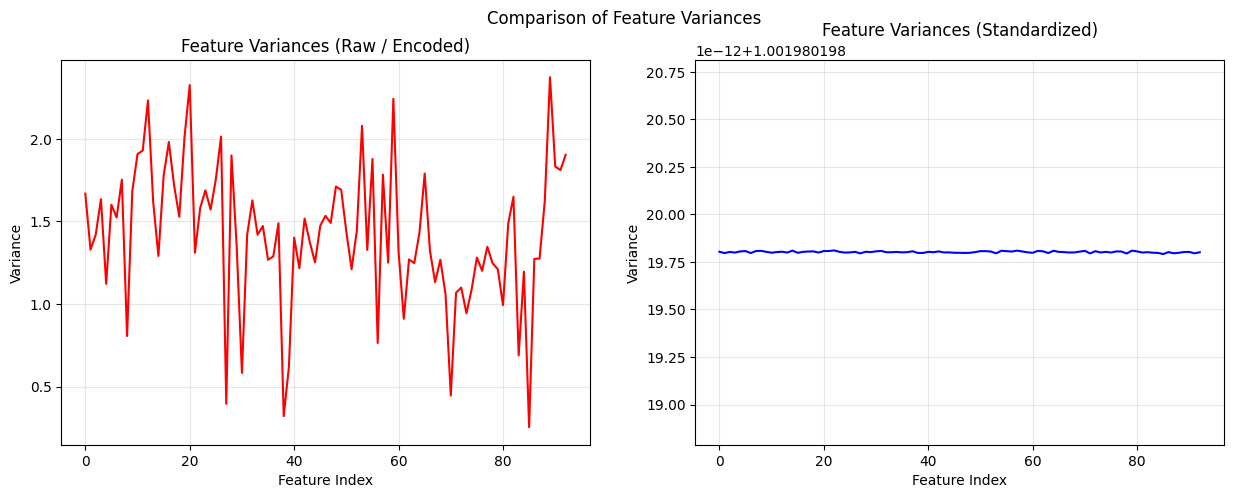

In [9]:
# [write the code here]
var_enc = responses_ft_enc.var()
var_pp = responses_ft_pp.var()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#here is the raw data variance visualized
ax1.plot(var_enc.values, color='red')
ax1.set_title("Feature Variances (Raw / Encoded)")
ax1.set_xlabel("Feature Index")
ax1.set_ylabel("Variance")
ax1.grid(True, alpha=0.3)

#here is the preprocessed data variance visualized
ax2.plot(var_pp.values, color='blue')
ax2.set_title("Feature Variances (Standardized)")
ax2.set_xlabel("Feature Index")
ax2.set_ylabel("Variance")
ax2.grid(True, alpha=0.3)
#we expect to see a line perfectly flat at 1 since the standardization makes all variances 1

plt.suptitle("Comparison of Feature Variances")
plt.show()

#### Comment the results obtained for the variances (max 150 words):
...

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

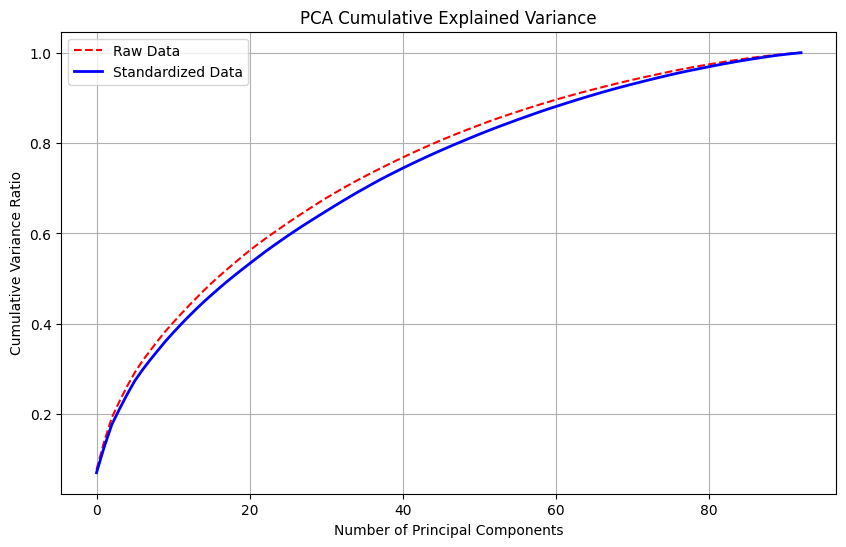

In [10]:
# [write the code here]

#PCA on raw encoded data
pca_enc = PCA()
pca_enc.fit(responses_ft_enc)

#PCA on standardized data
pca_pp = PCA()
pca_pp.fit(responses_ft_pp)

#the cumulative sums
cum_var_enc = np.cumsum(pca_enc.explained_variance_ratio_)
cum_var_pp = np.cumsum(pca_pp.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cum_var_enc, label='Raw Data', color='red', linestyle='--')
plt.plot(cum_var_pp, label='Standardized Data', color='blue', linewidth=2)


plt.title("PCA Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.legend()
plt.grid(True)
plt.show()


#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

...

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

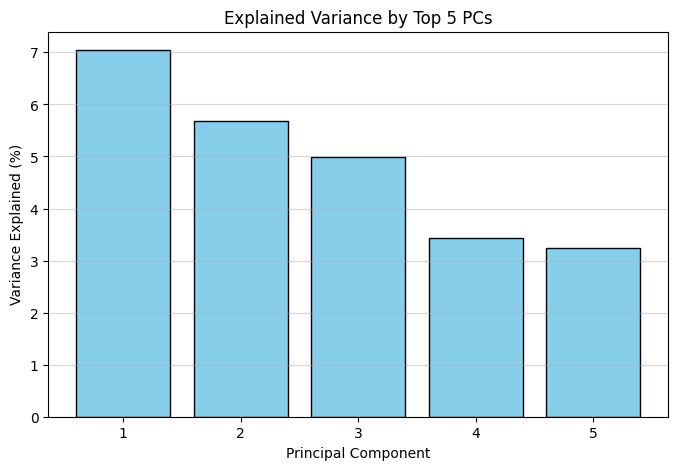

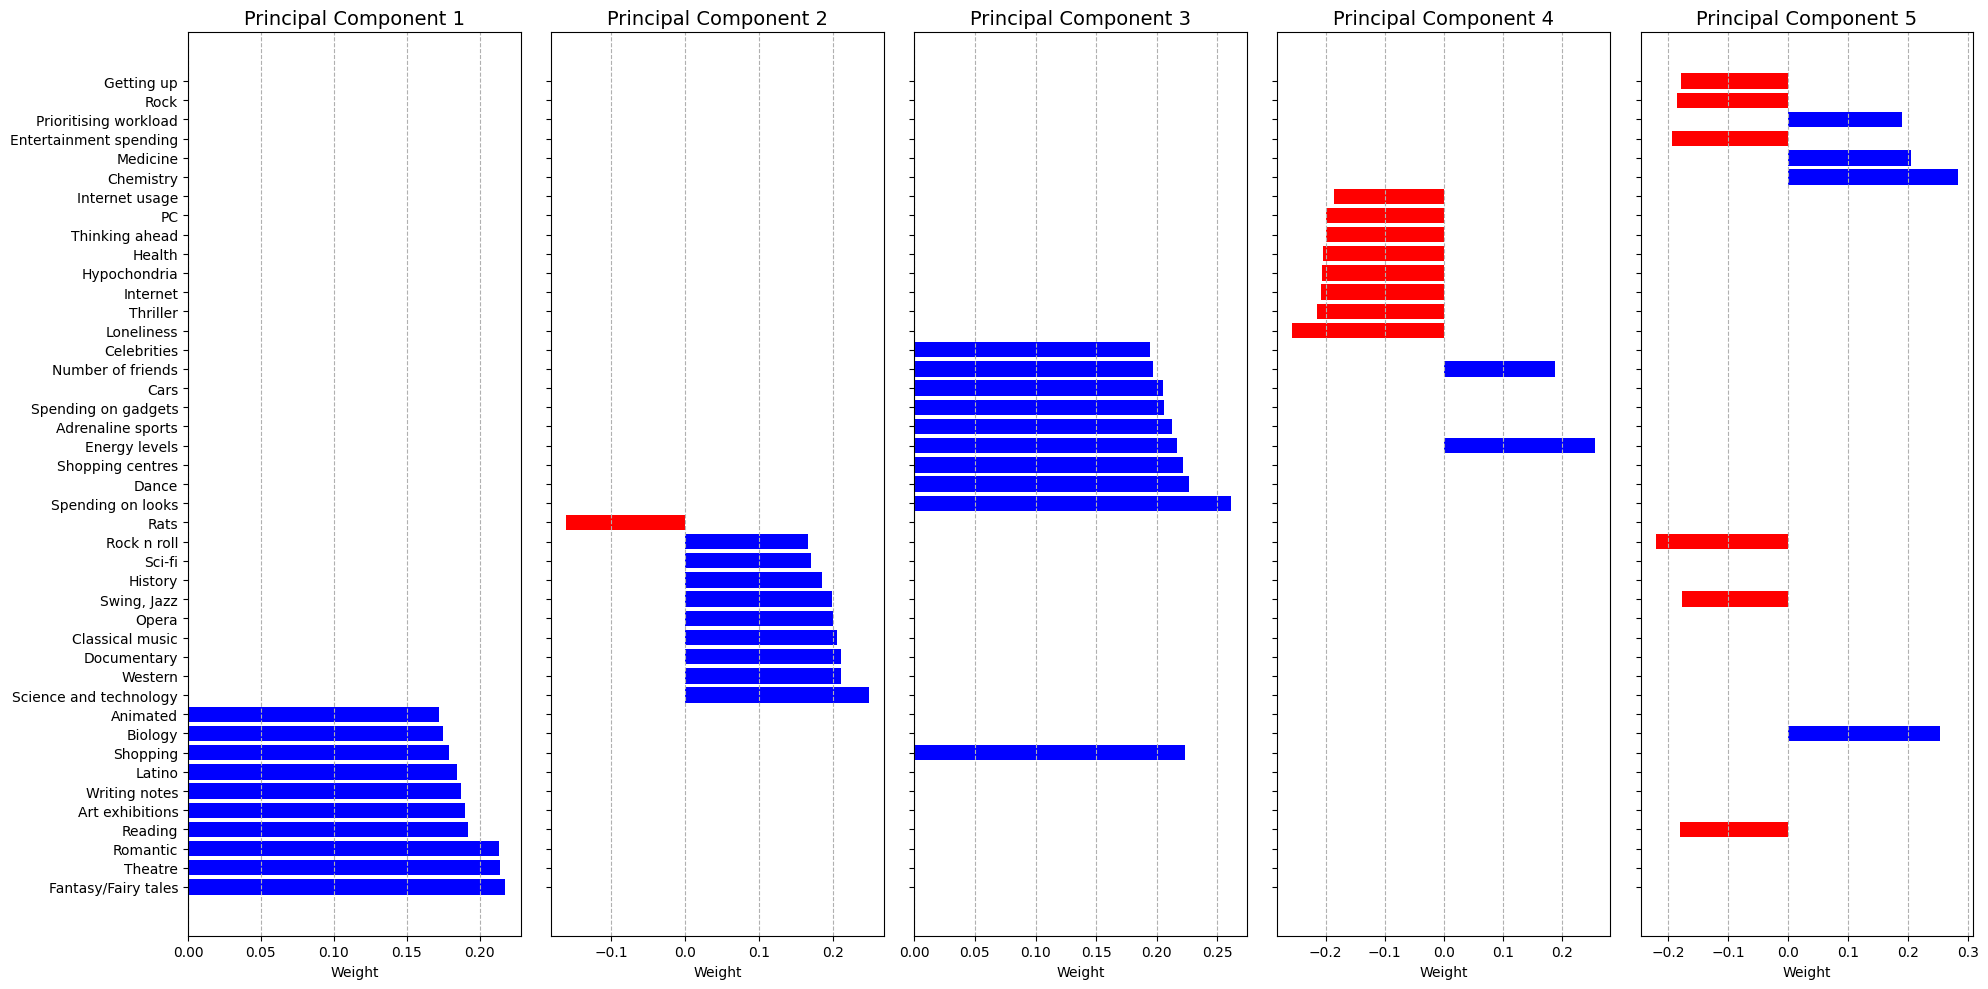

In [11]:
# [write the code here]

#we can see the m' is actually way greater than 5 from the previous graph but just to be sure we will check precisely
m_prime = np.argmax(cum_var_pp >= 0.33) + 1

m = min(5,m_prime)

pca_final = PCA(n_components=m)
responses_ft_pca = pca_final.fit_transform(responses_ft_pp)

#we will save it as a dataframe for easier handling
responses_ft_pca_df = pd.DataFrame(
    responses_ft_pca,
    index=responses_ft_pp.index,
    columns=[f"PC{i+1}" for i in range(m)]
)

#visualizing the explained variance as a barplot
plt.figure(figsize=(8, 5))
plt.bar(range(1, m+1), pca_final.explained_variance_ratio_ * 100, color='skyblue', edgecolor='black')
plt.title(f'Explained Variance by Top {m} PCs')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.xticks(range(1, m+1))
plt.grid(axis='y', alpha=0.5)
plt.show()

#now we will visualize the PCs with their most influential features so we can name them
def plot_loadings(pca, feature_names, n_top=10):
    components = pca.components_
    fig, axes = plt.subplots(1, len(components), figsize=(20, 10), sharey=True)
    
    for i, (comp, ax) in enumerate(zip(components, axes.flatten())):
        # Create a dataframe for this PC
        comp_df = pd.DataFrame({'feature': feature_names, 'weight': comp})
        # Sort by absolute weight to find the most important ones
        comp_df['abs_weight'] = comp_df['weight'].abs()
        top_features = comp_df.sort_values(by='abs_weight', ascending=False).head(n_top)
        
        # Color bars: Red for negative, Blue for positive
        colors = ['red' if x < 0 else 'blue' for x in top_features['weight']]
        
        ax.barh(top_features['feature'], top_features['weight'], color=colors)
        ax.set_title(f"Principal Component {i+1}", fontsize=14)
        ax.set_xlabel("Weight")
        ax.grid(axis='x', linestyle='--')
        
    plt.tight_layout()
    plt.show()

plot_loadings(pca_final, responses_ft_pp.columns, n_top=10)

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

...

#### Write the code for visualizing the score graph (with PC names on the axis):

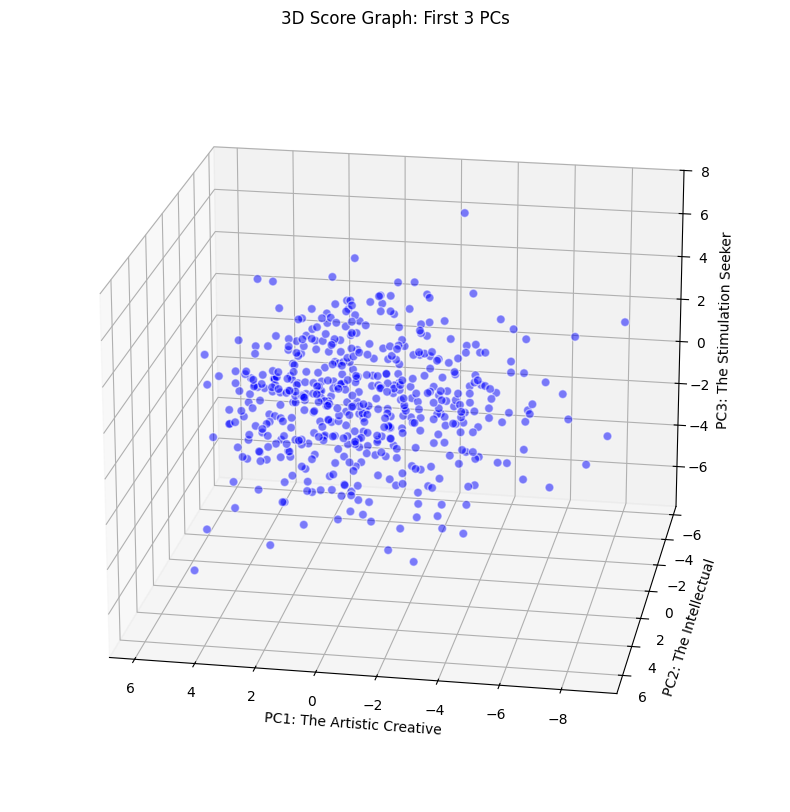

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = responses_ft_pca_df['PC1']
y = responses_ft_pca_df['PC2']
z = responses_ft_pca_df['PC3']


scatter = ax.scatter(x, y, z, c='blue', alpha=0.5, s=40, edgecolors='w')

#the names we gave them:
ax.set_xlabel('PC1: The Artistic Creative')
ax.set_ylabel('PC2: The Intellectual')
ax.set_zlabel('PC3: The Stimulation Seeker')
ax.set_title('3D Score Graph: First 3 PCs')

ax.view_init(elev=20, azim=100)

plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

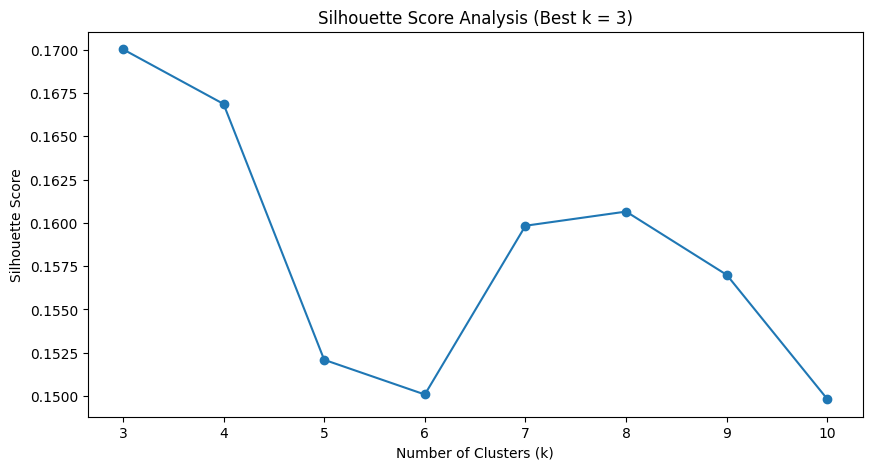

The optimal number of clusters is: 3


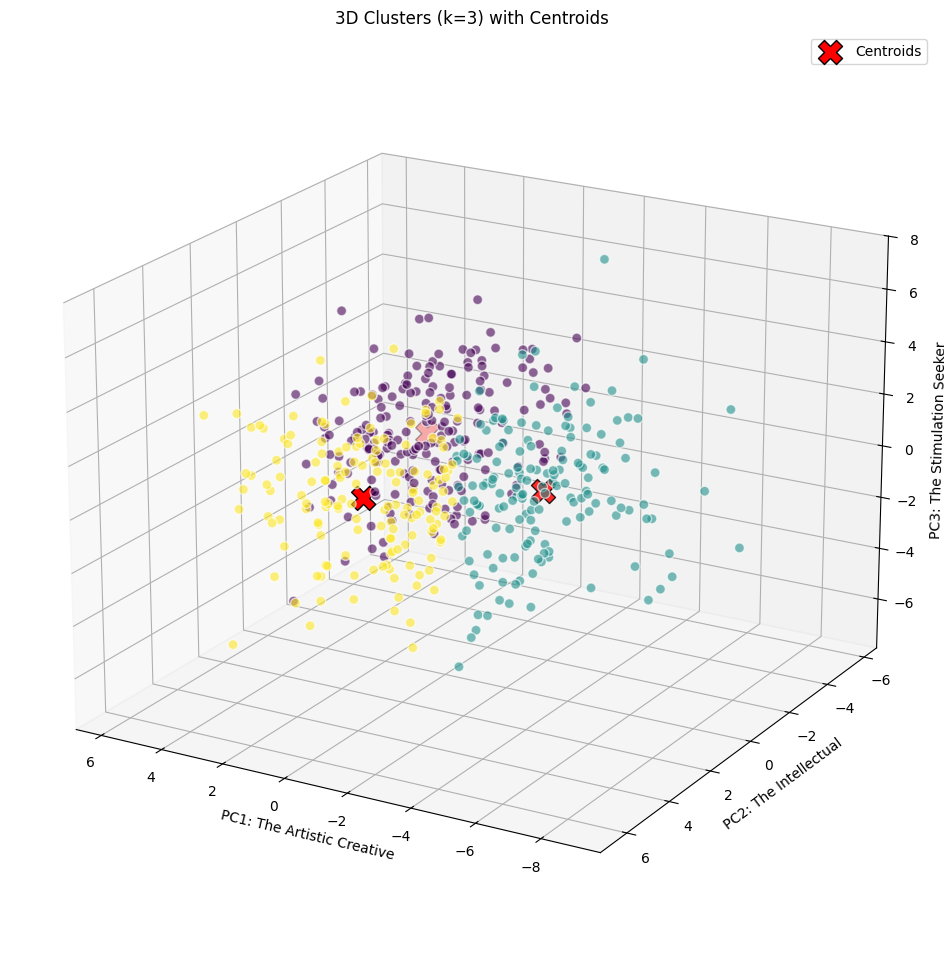

If PC1 is high in positive direction, it can be said that this group might be 'artistic creatives'.
If PC2 is high in positive direction, it can be said that this group might be 'intellectuals'.
If PC3 is high in positive direction, it can be said that this group might be 'stimulation seekers'.
If a cluster has small bars for everything, it represents 'average', people who do not stand out in any particular way.


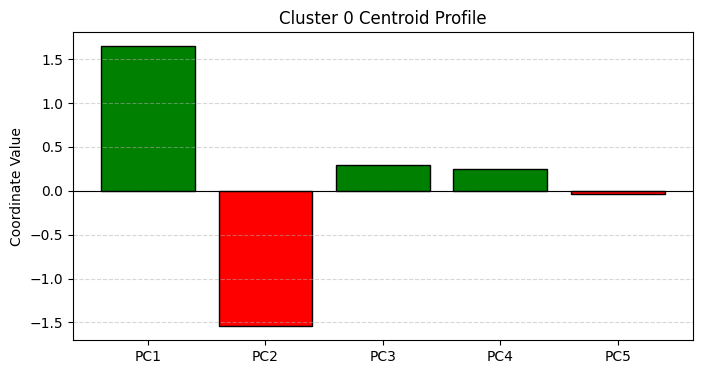

Interpretation for Cluster 0




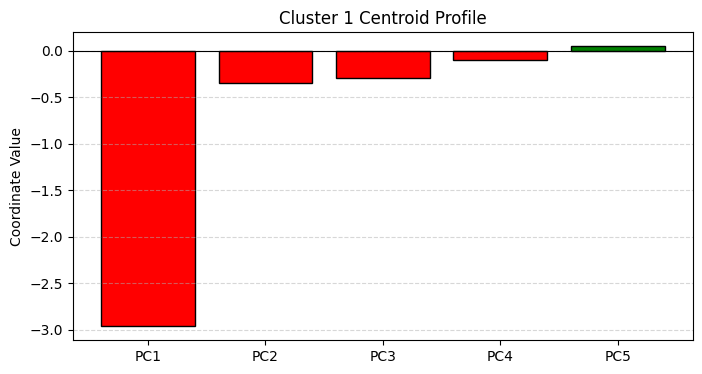

Interpretation for Cluster 1




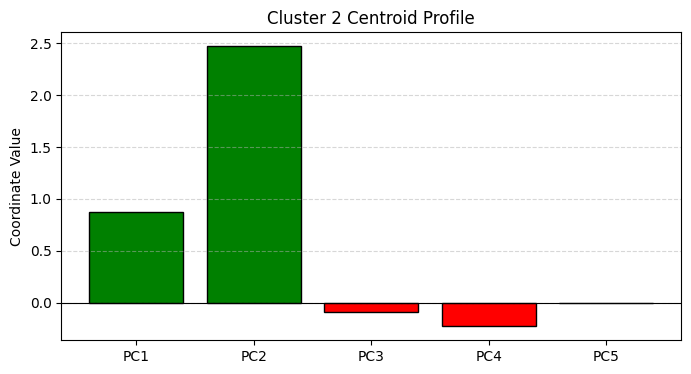

Interpretation for Cluster 2




In [ ]:
random_seed = min(StudentIDs)

# we save silhouette scores for different k values
silhouette_scores = []

# keep track of best value of k and best score
best_k = 0
best_score = -1

for k in range(3, 11):
    # create KMeans instance
    kmeans = KMeans(n_clusters = k,
                    random_state=random_seed,
                    n_init=10) # standard sweet spot
    
    # fir and predict cluster labels
    labels = kmeans.fit_predict(responses_ft_pca)

    #calculate silhouette score and save it in silhouette_scores list
    score = silhouette_score(responses_ft_pca, labels)
    silhouette_scores.append(score)

    # update best_k and best_score if the current score is better
    if score > best_score:
        best_k = k
        best_score = score

# plot silhouette scores vs k
plt.figure(figsize=(10, 5))

plt.plot(range(3, 11), silhouette_scores, marker='o')
plt.title(f'Silhouette Score Analysis (Best k = {best_k})')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print(f"The optimal number of clusters is: {best_k}")

# now that we have the best k, we fit KMeans again
kmeans_final = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10)
kmeans_final.fit(responses_ft_pca)
cluster_labels = kmeans_final.labels_
centroids = kmeans_final.cluster_centers_

# 3d visualization
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# ccatter points colored by cluster
scatter = ax.scatter(responses_ft_pca_df['PC1'], 
                     responses_ft_pca_df['PC2'], 
                     responses_ft_pca_df['PC3'], 
                     c=cluster_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w')

#plot centroids (Red X)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', marker='X', s=300, label='Centroids', edgecolors='black')

#labeling with interpretations from ex3
ax.set_xlabel('PC1: The Artistic Creative')
ax.set_ylabel('PC2: The Intellectual')
ax.set_zlabel('PC3: The Stimulation Seeker')
ax.set_title(f'3D Clusters (k={best_k}) with Centroids')
ax.legend()
ax.view_init(elev=20, azim=120)
plt.show()

print("If PC1 is high in positive direction, it can be said that this group might be 'Artistic Creatives'.")
print("If PC2 is high in positive direction, it can be said that this group might be 'Intellectuals'.")
print("If PC3 is high in positive direction, it can be said that this group might be 'Stimulation Seekers'.")
print("If a cluster has small bars for everything, it represents 'average', people who do not stand out in any particular way.")

# create names for the m PCs for the x axis
pc_names = [f"PC{i+1}" for i in range(centroids.shape[1])]

# plot a bar chart for each centroid
for i in range(best_k):
    plt.figure(figsize=(8, 4))
    
    # color bars: red for negative, green for positive
    colors = ['red' if x < 0 else 'green' for x in centroids[i]]
    
    plt.bar(pc_names, centroids[i], color=colors, edgecolor='black')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f'Cluster {i} Centroid Profile')
    plt.ylabel('Coordinate Value')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print(f"Interpretation for Cluster {i}")
    print("\n")

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

*The optimum number of clusters is 3 (best_k = 3 according to the silhouette score).*

**Cluster 0: "Artistic Creatives"**
**Interpretation:** This centroid is characterized by a highly positive value for PC1. The PC2 and PC3 is quite negative, while the other ones are near zero. This group represents individuals who are strongly driven by aesthetics, emotions, and expression. They likely scored high on questions regarding art, theatre, psychology, and music, while showing less interest in the hard sciences or competitive sports.

**Cluster 1: "Anti-Artistic Creatives" or "Realists"**
**Interpretation:** This centroid is defined almost entirely by a strong negative value for PC1. Since the positive direction of PC1 represents "The Artistic Creative," this group represents the direct opposite. These individuals likely expressed strong disinterest in abstract or creative subjects like art, theatre, poetry, and psychology. With PC2 and PC3 being close to zero, they are average in terms of intellectual and stimulation-seeking pursuits, but they are distinctively "grounded" or "conventional," preferring practical reality over artistic expression.

**Cluster 2: "Intellectuals"**
**Interpretation:** This centroid shows a distinctly positive value for PC2. The profile suggests a group deeply interested in science, technology, mathematics, and logical problem-solving. They tend to prioritize cognitive pursuits over the artistic expression of PC1, but this doesn't mean that they are not leaning towards the creative path as we observe from the bar plot. This cluster likely contains the students who enjoy physics, biology, and PC hardware.

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

...


#### Write the code for the visualizations cited in item 2 above:

In [14]:
# [write the code here]

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

...

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

In [15]:
# [write the code here]

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...